In [2]:
import pandas as pd

df = pd.read_csv('../data/census.csv')

In [4]:
for col in df.columns:
    col1 = col.strip()
    df = df.rename({col: col1}, axis=1)

In [3]:
df.head()

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


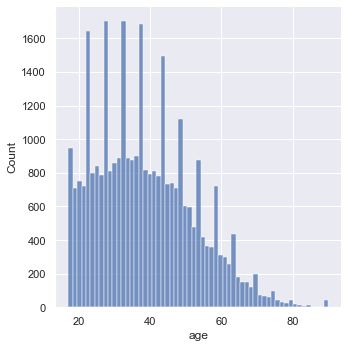

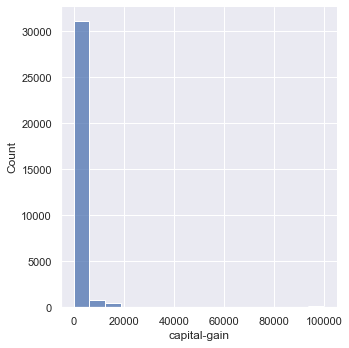

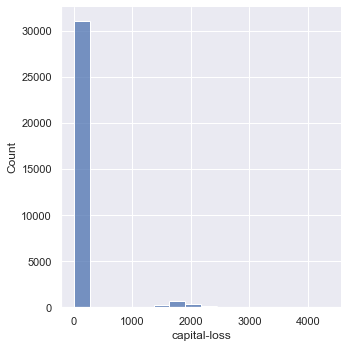

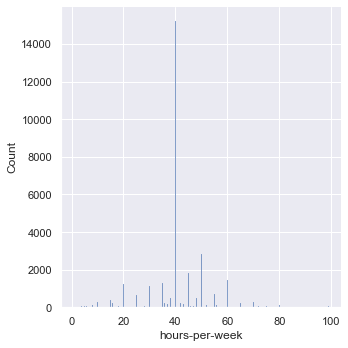

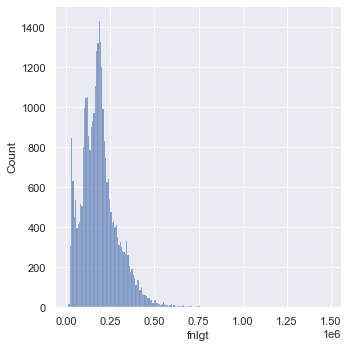

In [6]:
import seaborn as sns
sns.set()

cont = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'fnlgt']
for col in cont:
    sns.displot(data=df, x=col)

In [7]:
df = df[df['capital-gain'] <= 20000]
df = df[df['capital-loss'] <= 20000]
df = df[df['fnlgt'] <= 0.75e6]

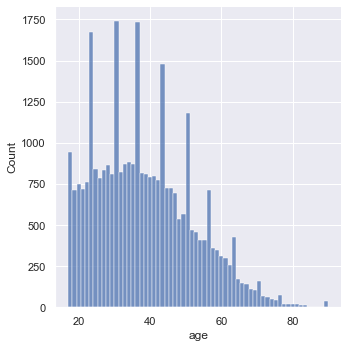

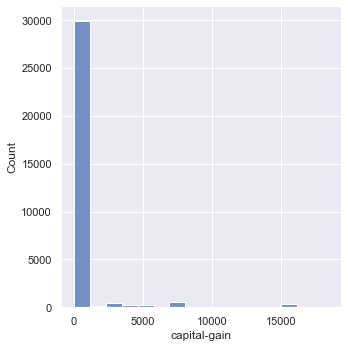

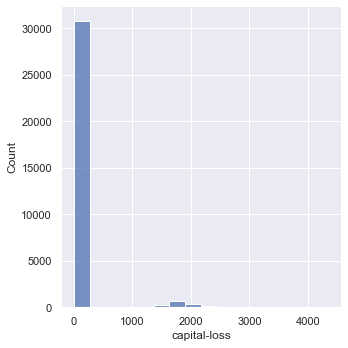

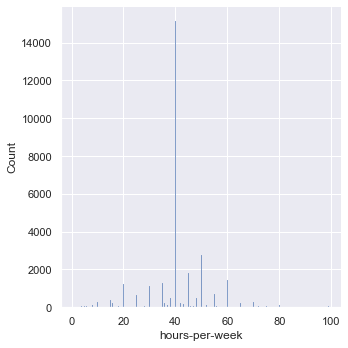

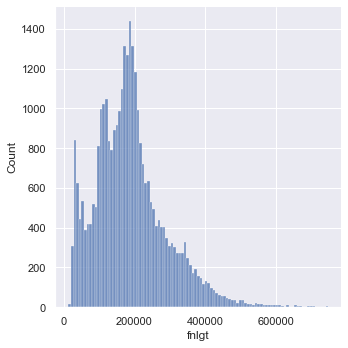

In [8]:
for col in cont:
    sns.displot(data=df, x=col)

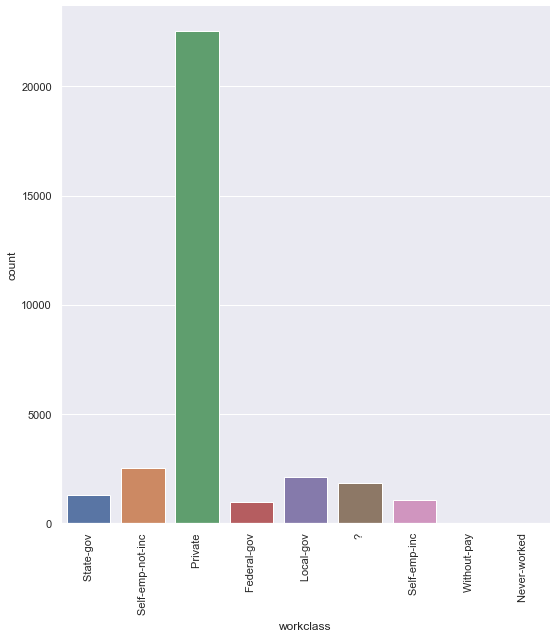

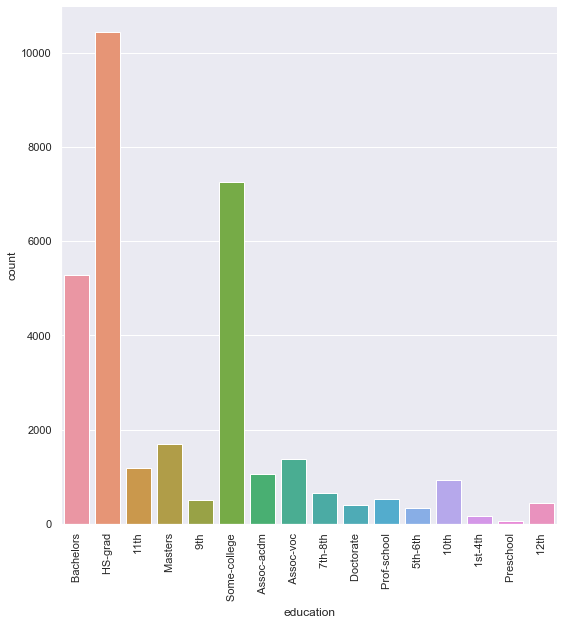

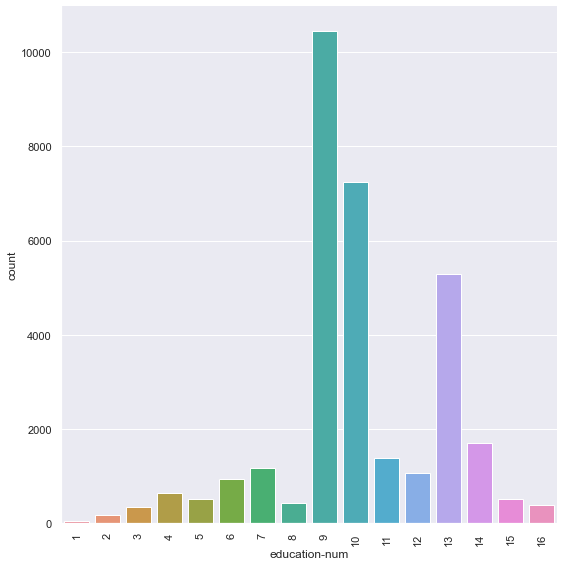

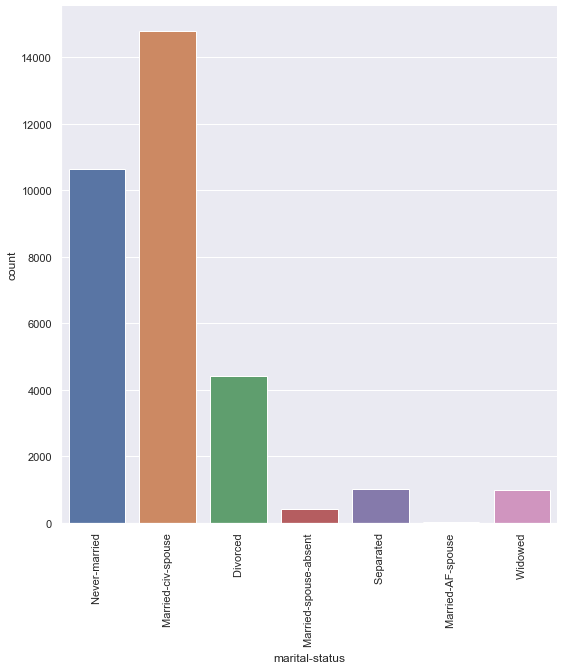

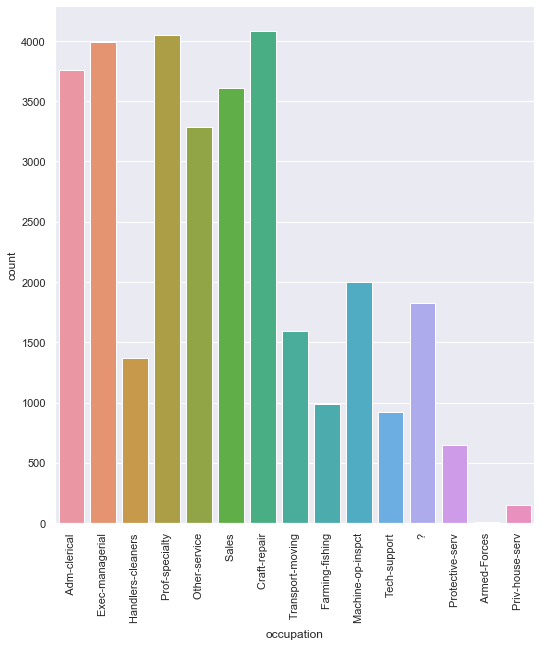

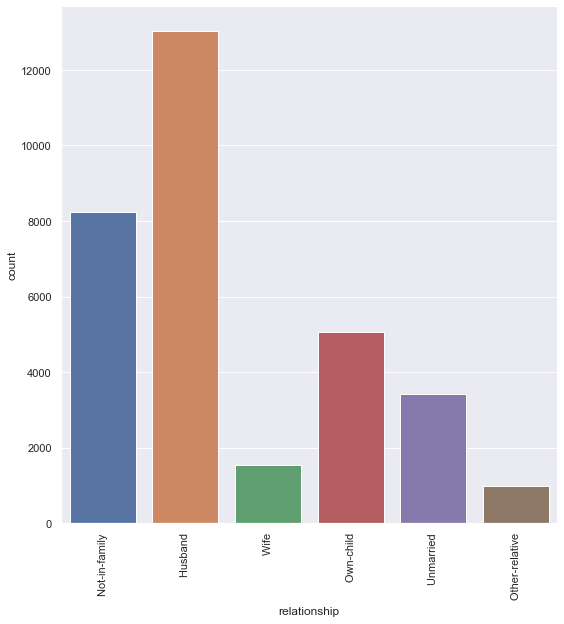

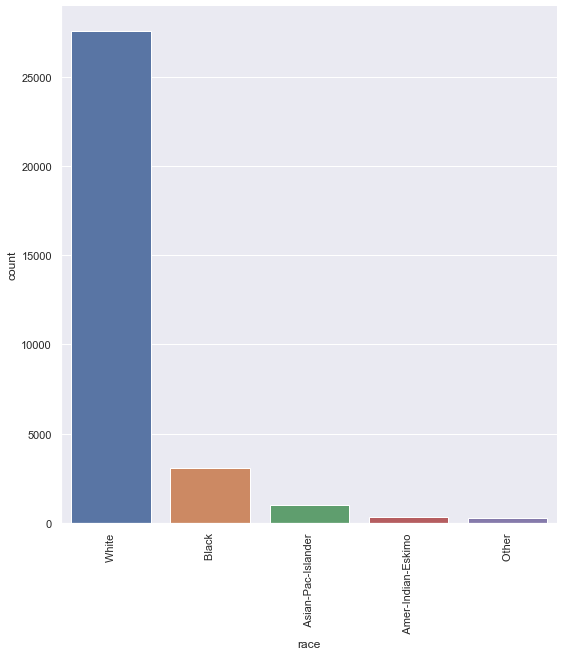

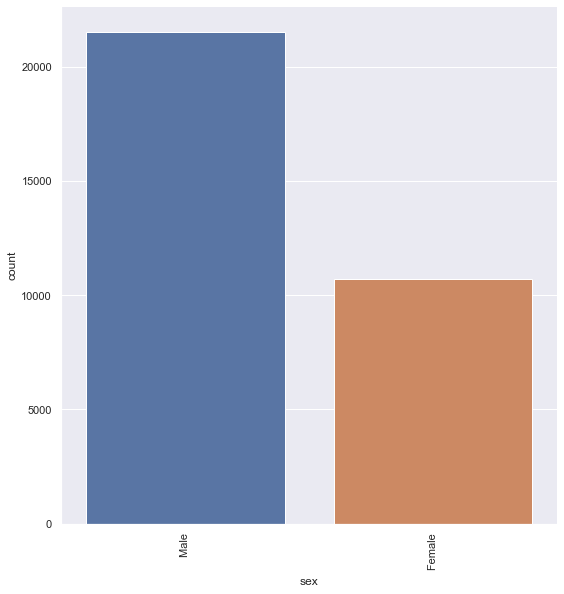

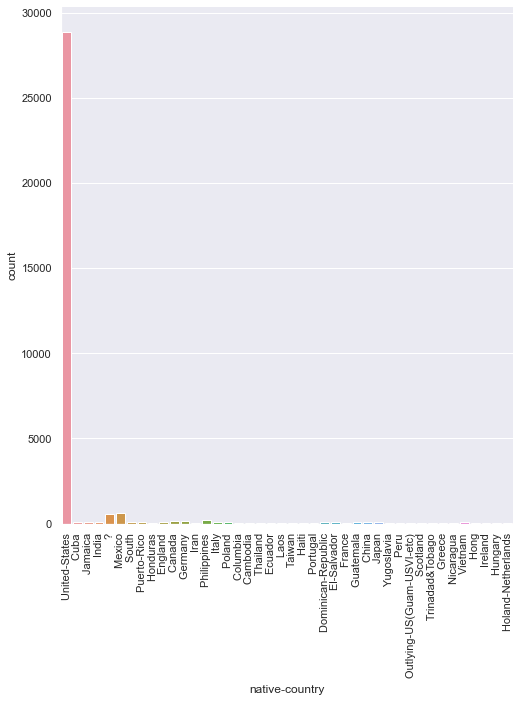

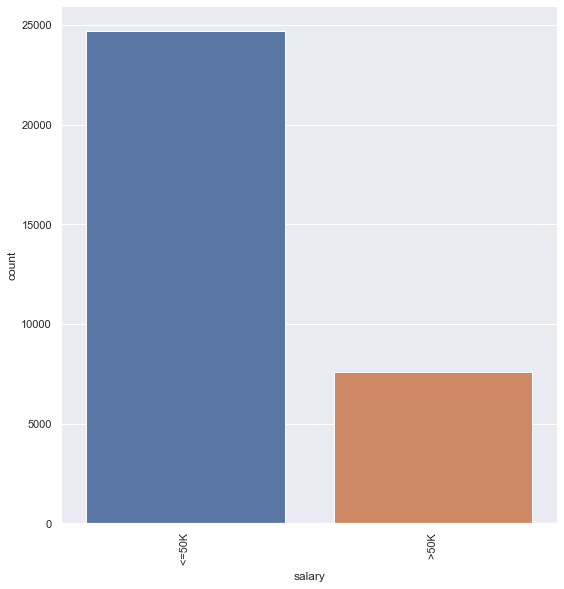

In [9]:
import matplotlib.pyplot as plt

cat = ['workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary']
for col in cat:
    sns.catplot(data=df, x=col, kind='count', height=8)
    plt.xticks(rotation=90)

In [10]:
df = df.drop(['native-country'], axis=1)
df = df[
    (df['workclass'] != 'without-pay') &
    (df['workclass'] != 'never-worked') &
    (df['occupation'] != 'Armed-Forces') &
    (df['marital-status'] != 'Married-AF-spouse')
]

In [32]:
df.head()

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K


In [16]:
df.to_csv('../data/census_cleaned.csv', index=None, header=df.columns)